In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
model = models.Sequential()

In [3]:
model.add(layers.Conv2D(32,(3,3),activation = "relu",input_shape = (28,28,1)))

In [4]:
model.add(layers.MaxPooling2D((2,2)))

In [5]:
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [6]:
model.add(layers.MaxPooling2D((2,2)))

In [7]:
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())

In [10]:
model.add(layers.Dense(64,activation = "relu"))

In [11]:
model.add(layers.Dense(10,activation = "softmax"))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [13]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [14]:
(train_data,train_labels),(test_data,test_label) = mnist.load_data()

In [15]:
train_data = train_data.reshape((60000,28,28,1))

In [16]:
train_data = train_data.astype("float32")/255

In [17]:
test_data = test_data.reshape((10000,28,28,1))
test_data = test_data.astype("float32")/255

In [18]:
train_labels = to_categorical(train_labels)

In [19]:
test_labels = to_categorical(test_label)

In [20]:
model.compile(optimizer="rmsprop",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [21]:
history = model.fit(train_data,train_labels,epochs = 3,batch_size = 64,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 36s 747us/step - loss: 0.2072 - acc: 0.9353 - val_loss: 0.0612 - val_acc: 0.9809
Epoch 2/3
48000/48000 [==============================] - 40s 839us/step - loss: 0.0538 - acc: 0.9828 - val_loss: 0.0463 - val_acc: 0.9854
Epoch 3/3
48000/48000 [==============================] - 37s 761us/step - loss: 0.0368 - acc: 0.9886 - val_loss: 0.0485 - val_acc: 0.9859


In [22]:
test_loss,test_acc = model.evaluate(test_data,test_labels)

10000/10000 [==============================] - 2s 242us/step


0.988


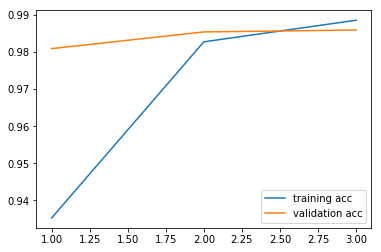

In [25]:
print(test_acc)
import matplotlib.pyplot as plt
#print(history.history.items())
x = [x for x in range(1,4)]
acc = history.history["acc"]
val_acc = history.history["val_acc"]
plt.plot(x,acc,label = "training acc")
plt.plot(x,val_acc,label = "validation acc")
plt.legend()
plt.show()

7


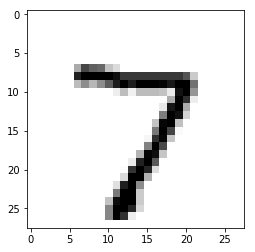

In [26]:
import numpy as np
np.argmax(model.predict(test_data[0].reshape((1,28,28,1))))
plt.imshow(test_data[0].reshape((28,28)),cmap = "binary")
print(np.argmax(model.predict(test_data[0].reshape(1,28,28,1))))

In [27]:
model.save("mnist_conv_digits.h5")